In [1]:
from glob import glob
import seaborn as sns
from scipy.io import wavfile
import os
from os import path
import h5py
import ephys_util
from ephys_util import butter_bandpass_filter, load_wm, get_spikes, psth_channel, get_onsets, h5_to_wav, load_data_new, load_data, timed, truncate_audio_new
from datetime import datetime

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\acquisition\.conda\envs\acquisition\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('talk')

# convert h5 audio to wav

In [3]:
isolation2 = r'D:\acquired_data\2021_08_10_15_10_34_138175_isolation'

dirnames = [isolation2]

In [4]:
'''
for i in dirnames:
    h5_to_wav(i)
'''

'\nfor i in dirnames:\n    h5_to_wav(i)\n'

# get the onsets 

In [5]:
onset_txt = """
41.539
116.031 
190.522 
265.074 
339.563 
414.112 
488.644 
563.217 
637.766 
712.319         
786.867 
861.420 
935.910 
1010.403 
1084.952 
1159.510 
1234.064 
1308.618 
1383.172 
1457.726"""
isolation2_onsets = np.array([float(a.strip()) for a in onset_txt.split('\n') if a.strip() != ''])
# isolation2_onsets = get_onsets(35.933, 65.6, 40, 2)

In [6]:
len(isolation2_onsets[:-1])

19

# do analysis

In [7]:
all_onsets = [isolation2_onsets]
dirnames = [isolation2]
sr_am, am = wavfile.read('white_sine_2s.wav')
for i in range(len(all_onsets)):
    print('Start:' , datetime.datetime.now())
    dirname = dirnames[i]
    
    sr_phys, data_phys, data_audio, ephys_trigger = load_data(dirname, phys_bandpass=(200, 4000))
    
    spikes = get_spikes(data_phys, threshold=4)
    
    
    
    onsets = all_onsets[i]
    
    folder_name = 'psth_am'
    
    if os.path.exists(os.path.join(dirname, folder_name)) == False:
        os.mkdir(os.path.join(dirname, folder_name))

    psth_channel(spikes, am, onsets, ephys_trigger, sr_audio = sr_am,
                 save_fig=True, outname='_am_{}'.format(dirname.split('_')[-1]),
                 savedir=os.path.join(dirname, folder_name), hide_plot=True)
    print('Stop:' , datetime.datetime.now())
    print()
#     psth_channel(spikes, am, onsets, ephys_trigger, sr_audio = sr_am,
#                             save_fig=True, outname='_am_{}'.format(dirname.split('_')[-1]), hide_plot=True)

Start: 2021-10-06 15:39:55.005823
Loading physiology data...
15:39:57- Function io_fromfile, called by load_wm, executed in 1.922s
15:40:00- Function load_wm, called by load_data, executed in 5.630s
Bandpassing from 200-4000 Hz...
15:40:00- Function butter_bandpass, called by butter_bandpass_filter, executed in 0.003s
15:41:01- Function butter_bandpass_filter, called by load_data, executed in 1:00
Computing mean signal across all channels...
Subtracting mean signal across all channels...

Truncating audio...
Ephys trigger detected at analog sample number 3828975

15:41:15- Function truncate_audio, called by load_data, executed in 4.472s

15:41:15- Function load_data, called by <module>, executed in 1:20
15:41:31- Function make_thresholds, called by get_spikes, executed in 15.737s
15:41:44- Function get_spike_loc, called by get_spikes, executed in 12.683s
15:41:45- Function index_search, called by get_spikes, executed in 0.001s
15:41:45- Function get_spikes, called by <module>, executed

15:43:56- Function make_plots, called by psth_channel, executed in 0.435s
15:43:59- Function io_save_fig, called by psth_channel, executed in 3.151s
15:43:59- Function make_plots, called by psth_channel, executed in 0.189s
15:44:02- Function io_save_fig, called by psth_channel, executed in 3.155s
15:44:02- Function make_plots, called by psth_channel, executed in 0.190s
15:44:06- Function io_save_fig, called by psth_channel, executed in 3.179s
15:44:06- Function make_plots, called by psth_channel, executed in 0.201s
15:44:09- Function io_save_fig, called by psth_channel, executed in 3.109s
15:44:09- Function make_plots, called by psth_channel, executed in 0.186s
15:44:12- Function io_save_fig, called by psth_channel, executed in 3.215s
15:44:13- Function make_plots, called by psth_channel, executed in 0.189s
15:44:16- Function io_save_fig, called by psth_channel, executed in 3.095s
15:44:16- Function make_plots, called by psth_channel, executed in 0.193s
15:44:19- Function io_save_fig, 

## troubleshoot

In [8]:
import ephys_util

In [9]:
audio = am
sr_audio = 125000
pad = 1

all_spikes = []

for onset in isolation2_onsets:

    dur = len(audio)/sr_audio
    offset = onset + dur + pad
    onset = onset - pad
    total_dur = dur + (2*pad)


    spikes_trunc = ephys_util.truncate_spikes(spikes, onset = onset,offset = offset,ephys_trigger=ephys_trigger)
    print(shape(spikes_trunc))
    all_spikes.append(spikes_trunc)

15:45:25- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.000s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.000s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.000s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:45:25- Function truncate_spikes, called by <module>, executed in 0.001s
(64,)
15:45:25- Function truncate_

In [10]:
ephys_trigger/125000

30.6318

In [11]:
isolation2_onsets-(ephys_trigger/125000)

array([  10.9072,   85.3992,  159.8902,  234.4422,  308.9312,  383.4802,
        458.0122,  532.5852,  607.1342,  681.6872,  756.2352,  830.7882,
        905.2782,  979.7712, 1054.3202, 1128.8782, 1203.4322, 1277.9862,
       1352.5402, 1427.0942])

In [12]:
(shape(data_phys)[0]/sr_phys) - 1800

-1799.99488

In [13]:
1800 + 872.331 - (27.451544)

2644.879456

In [14]:
shape(spikes_trunc)

(64,)

In [15]:
#for i in range(64):
#    ch = np.vstack(all_spikes)[:,i]
#    print(i)


In [16]:
len(all_spikes)

20

In [17]:
pad

1

# psth plots

In [18]:
psths_iso2 = np.load(glob(path.join(isolation2, r'psth_am/*.npy'))[0], allow_pickle=True)

C:\Users\acquisition\.conda\envs\acquisition\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


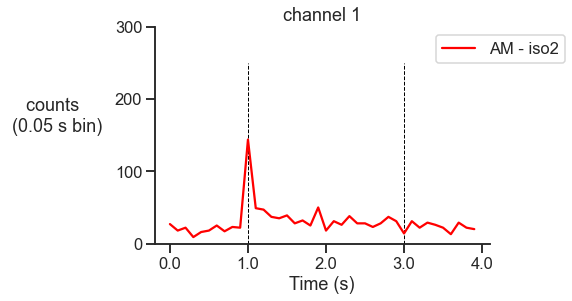

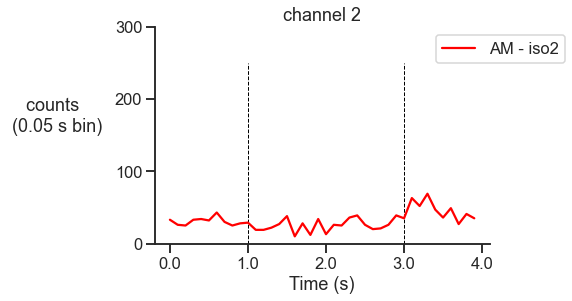

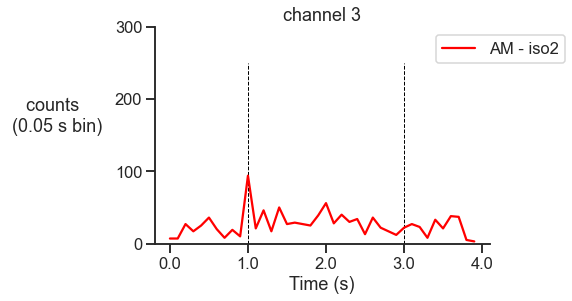

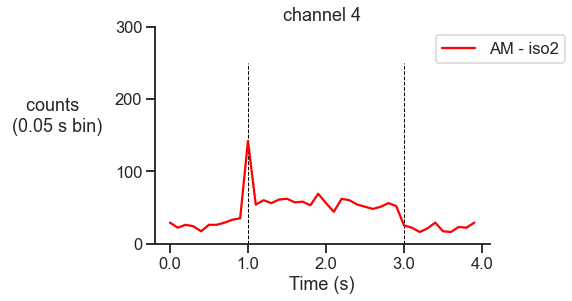

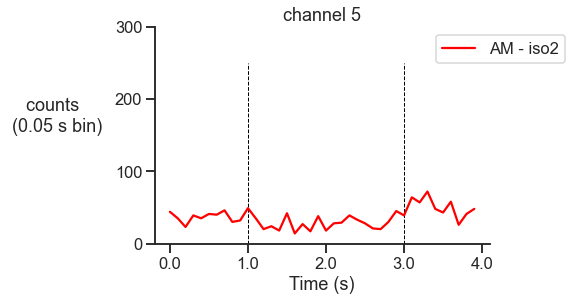

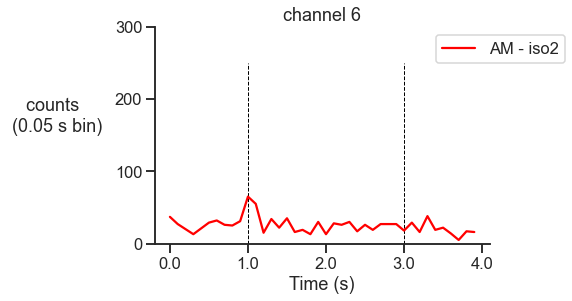

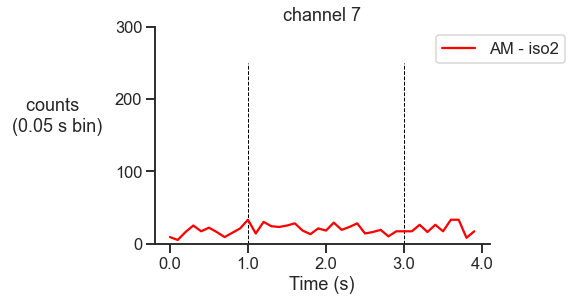

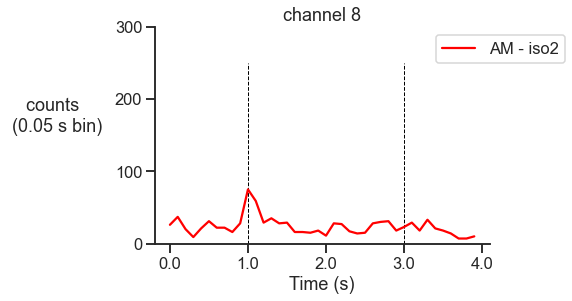

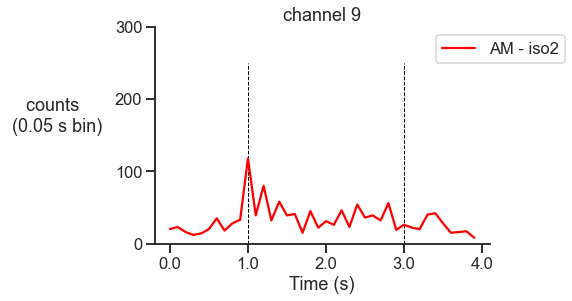

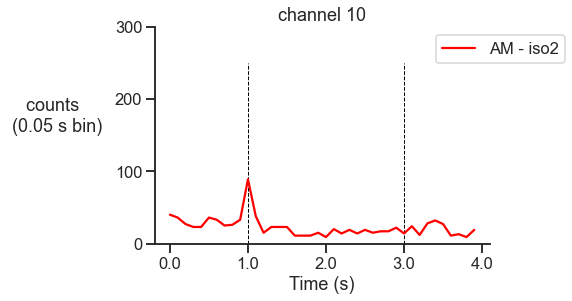

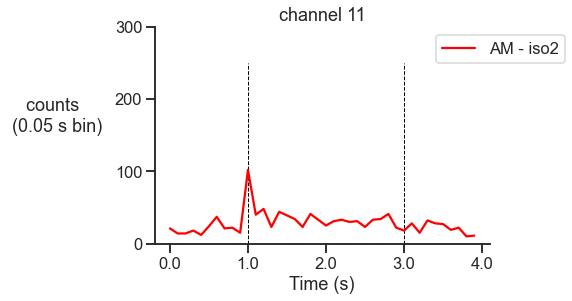

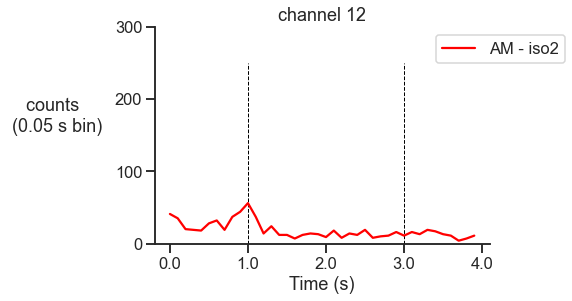

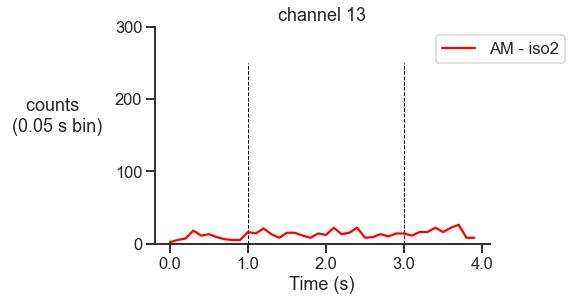

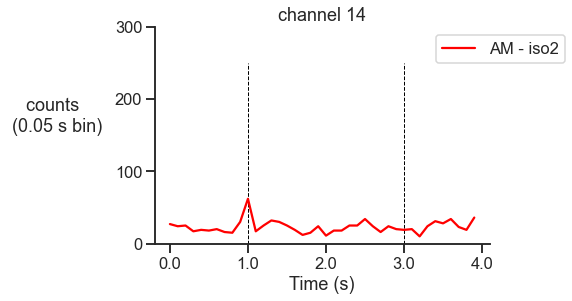

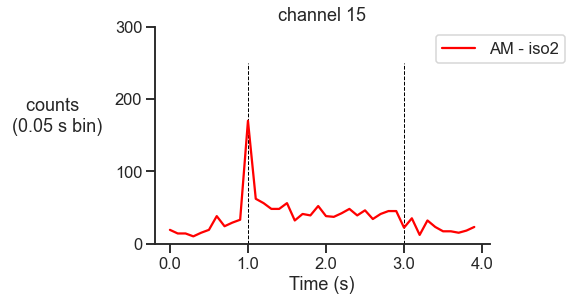

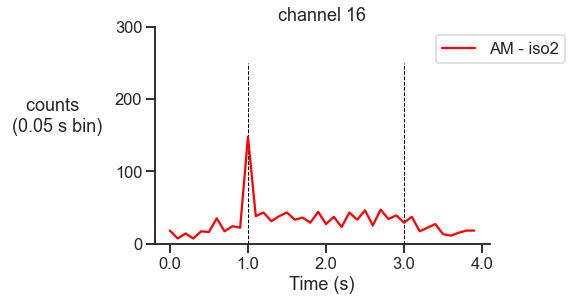

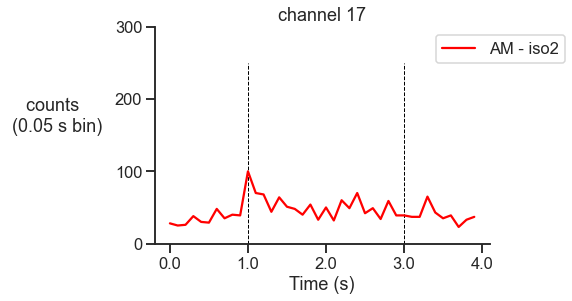

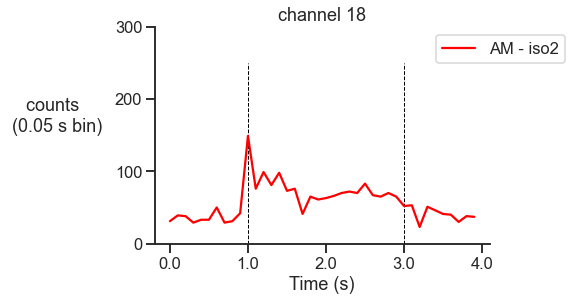

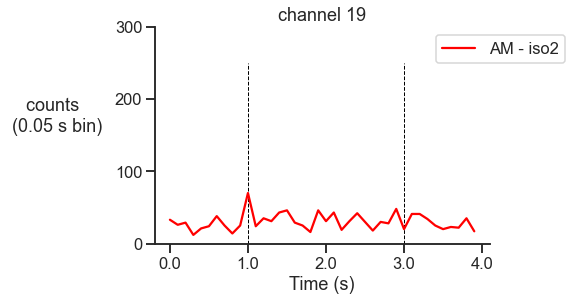

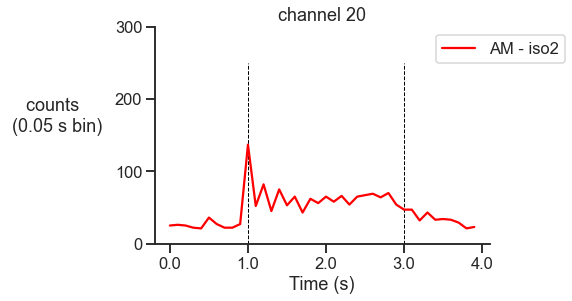

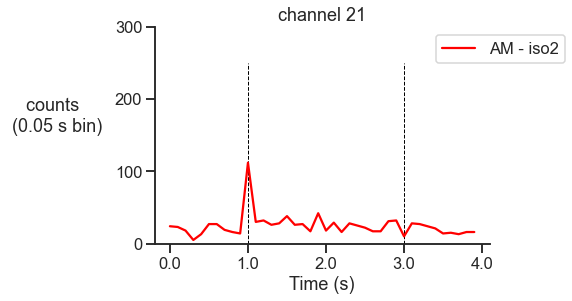

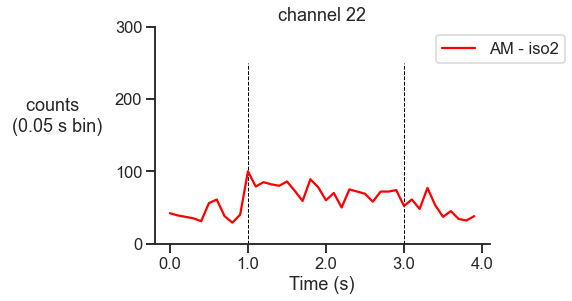

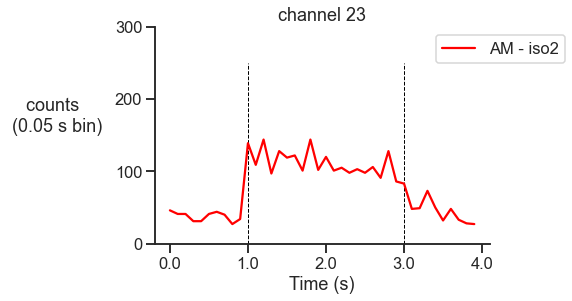

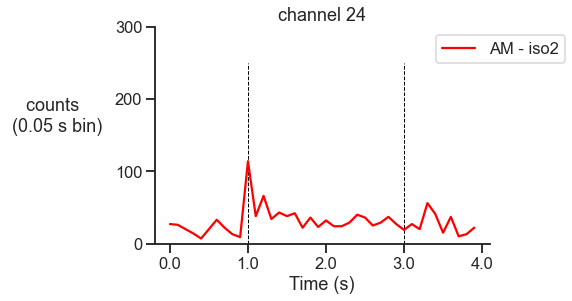

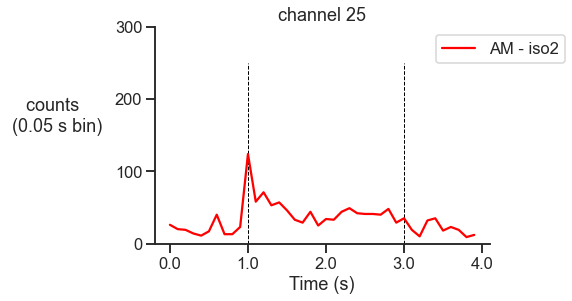

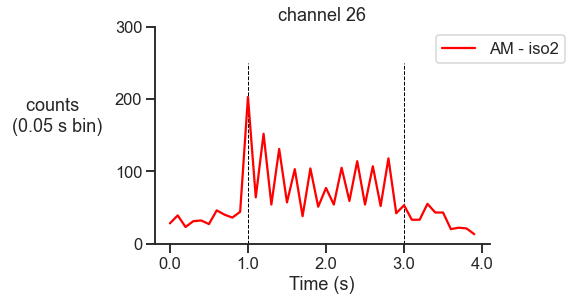

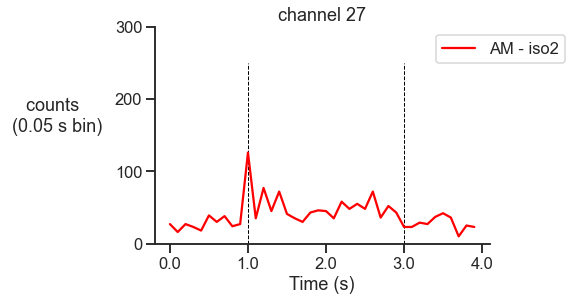

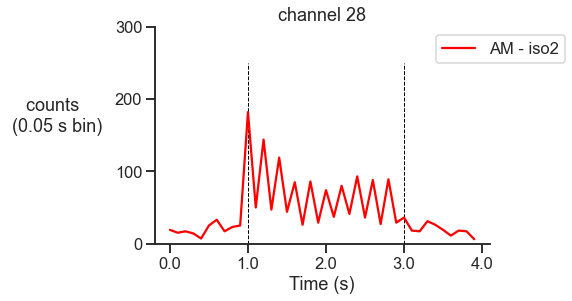

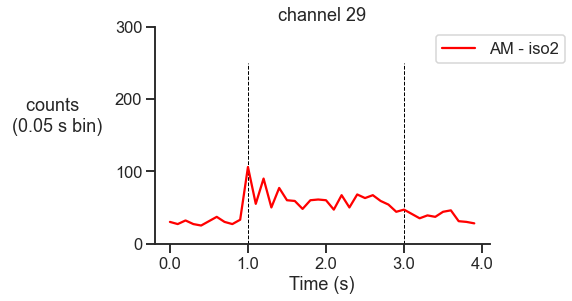

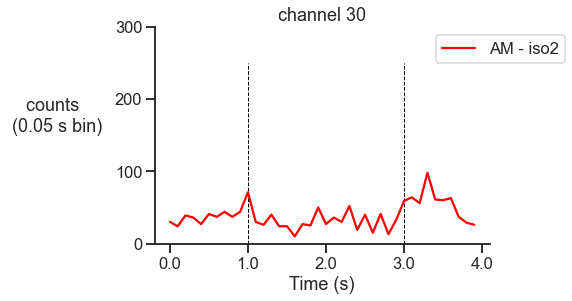

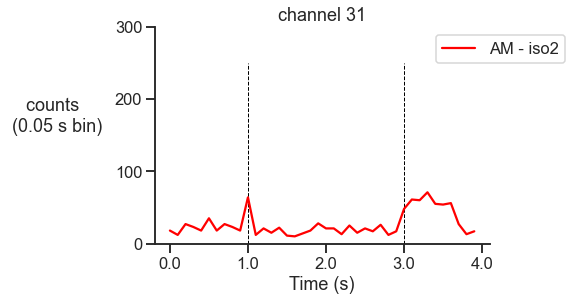

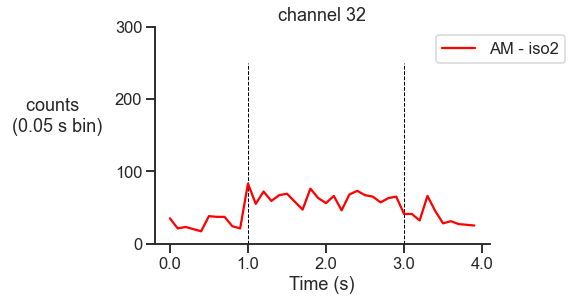

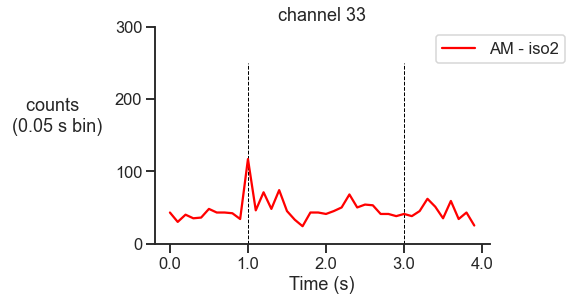

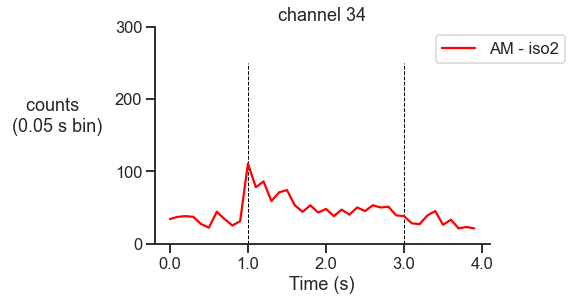

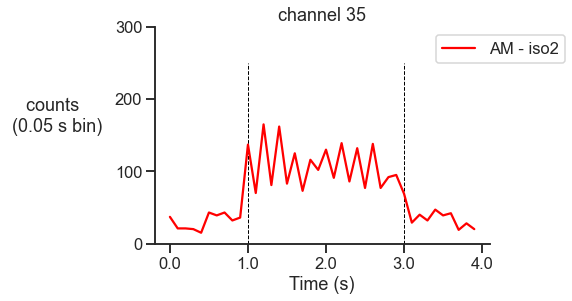

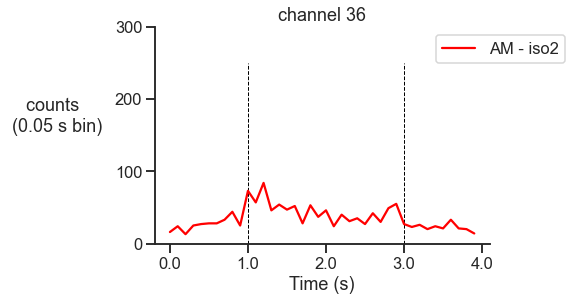

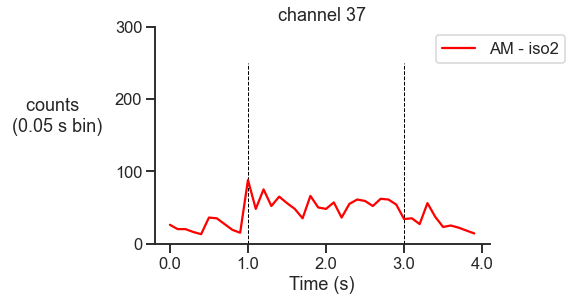

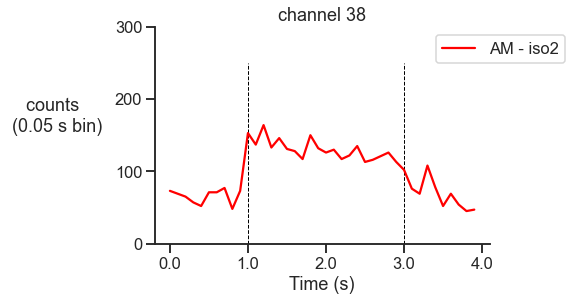

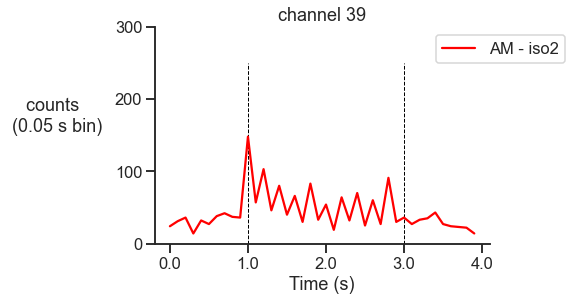

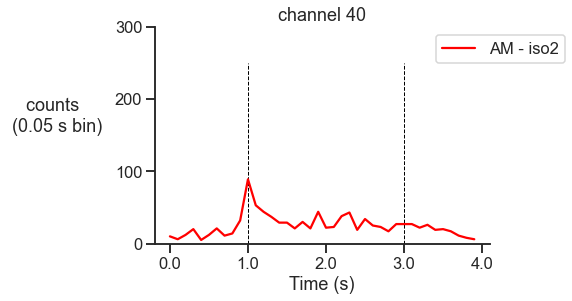

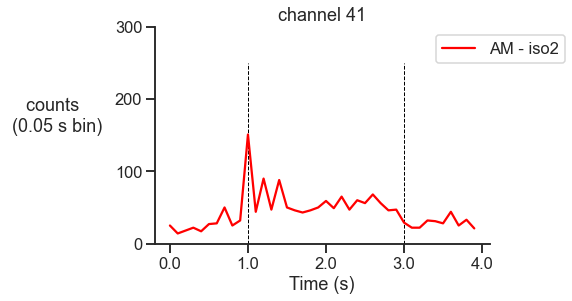

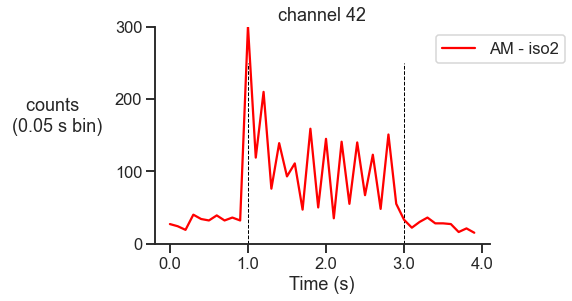

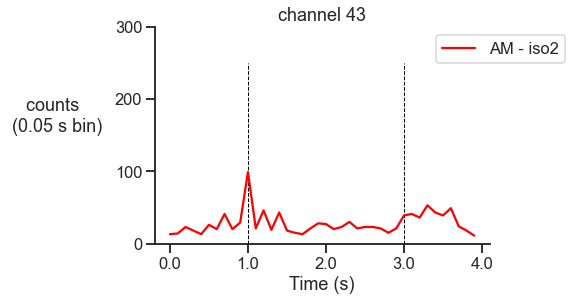

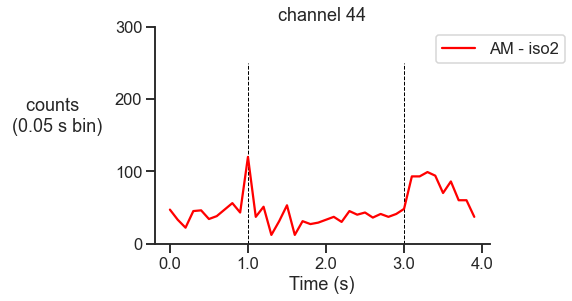

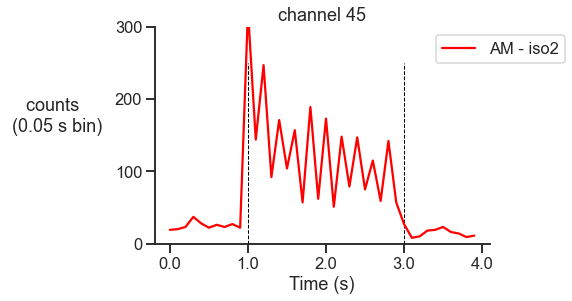

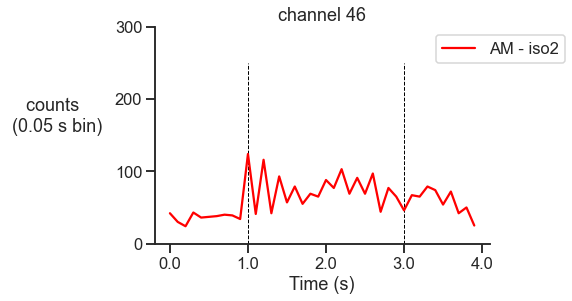

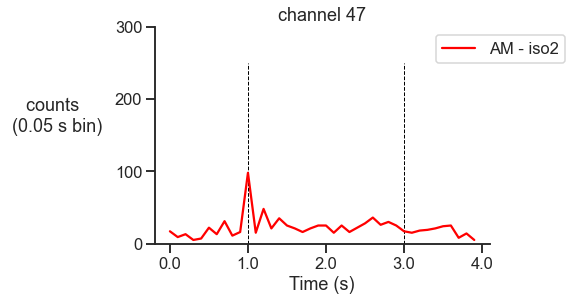

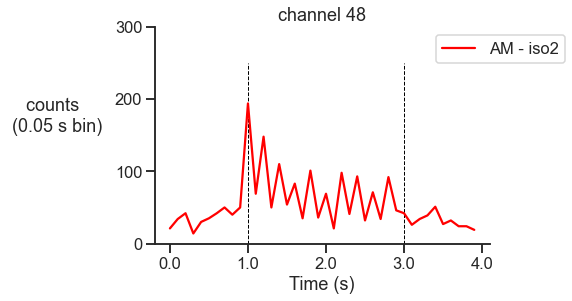

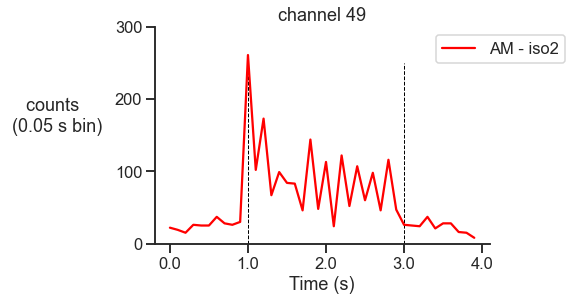

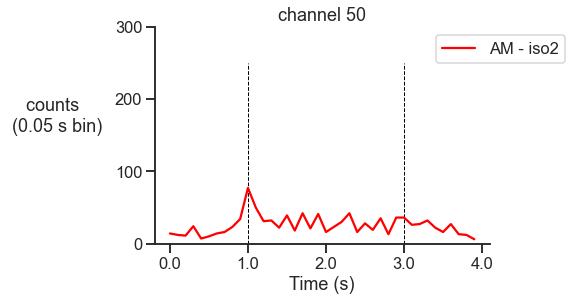

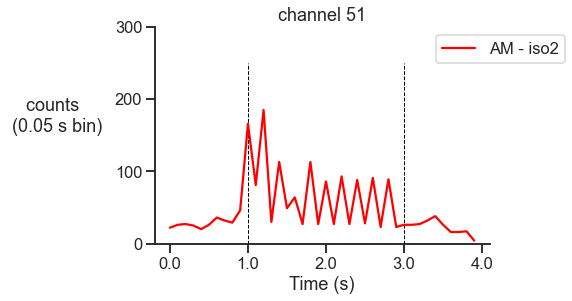

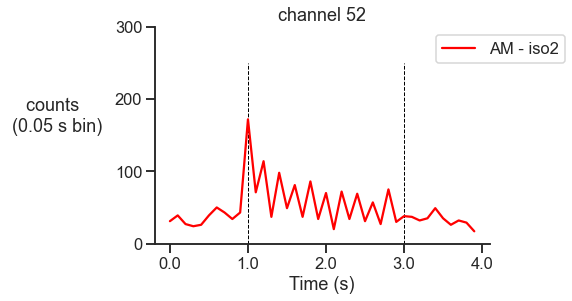

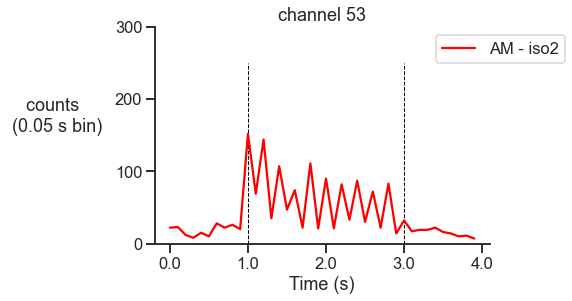

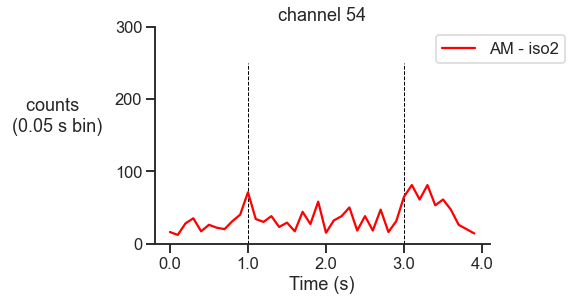

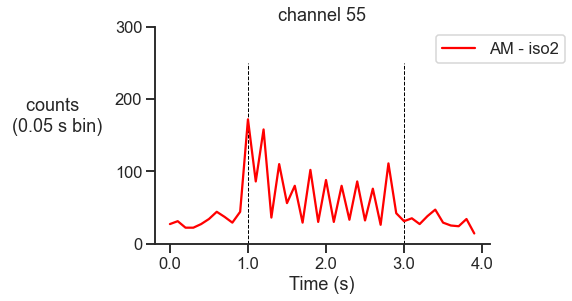

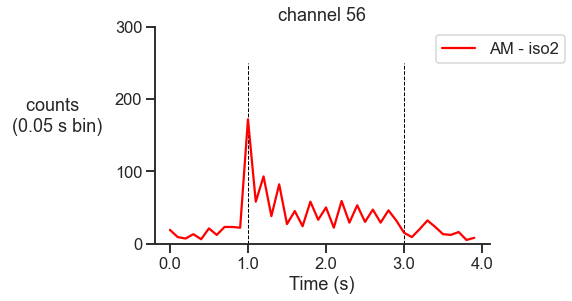

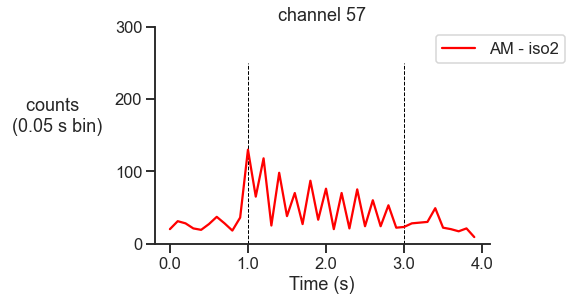

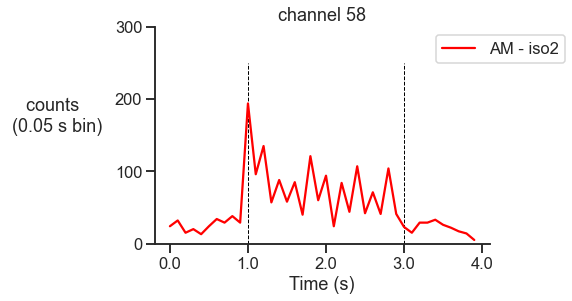

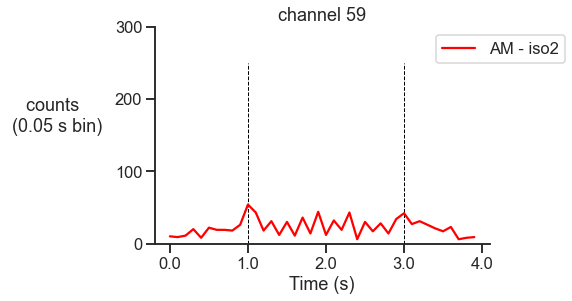

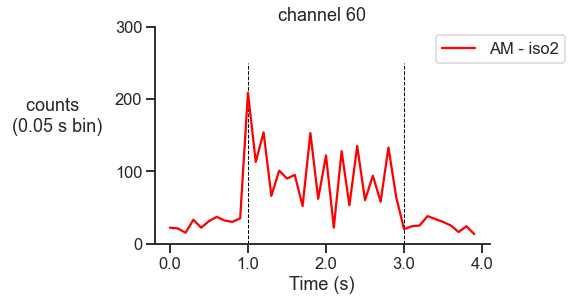

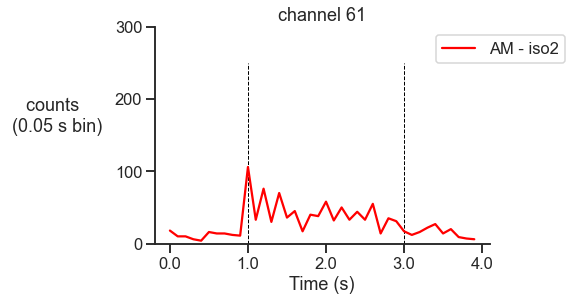

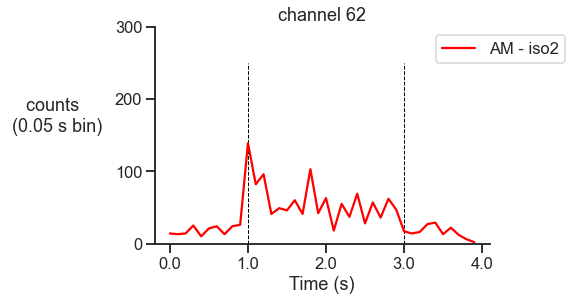

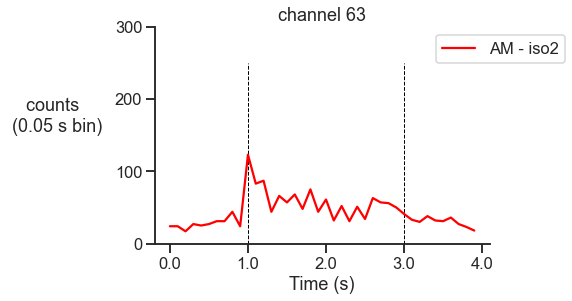

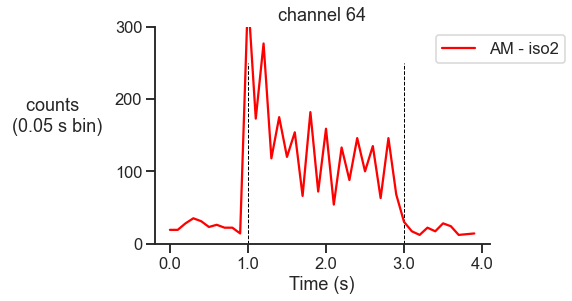

In [19]:
for i in range(64):
    figure()
   
    plot(psths_iso2[:,1][i][:-1], psths_iso2[:,0][i], label='AM - iso2', color='red', zorder=2) 

    
    ylim(-1,300)
    vlines(12500, 0, 250, linestyle='--', color='k', linewidth=1)
    vlines(12500*3, 0, 250, linestyle='--', color='k', linewidth=1)
    ylabel('counts \n (0.05 s bin)', rotation=0, labelpad=60)
    xticks(np.arange(0, psths_iso2[:,1][i][-1]+1, 12500),
           np.arange(0, psths_iso2[:,1][i][-1]+1, 12500)/12500)
    xlabel('Time (s)')
    legend(bbox_to_anchor=(1.25,1))
    title('channel {}'.format(i+1))
    sns.despine()